# Atividade Dissertativa - Deep Learning


# Importar bibliotecas principais


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
import seaborn as sns
from sklearn.model_selection import train_test_split #Modulo para separar os conjuntos de treino, validacao e teste.
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD


## Importar dataset fashion

### Importando  dados do Fashion MNIST

In [3]:
((train_x, train_y), (test_x, test_y)) = keras.datasets.fashion_mnist.load_data()
rotulos_classes = ['Camisetas','Calças','Blusas','Vestidos','Casacos','Sandalias','Camisas','Tenis','Bolsas','Botas']

### Exibindo inicialmente grupo de Treinamento e grupo de Teste e depois sera separado uma porcentagem do grupo de treinamento para a validação. 


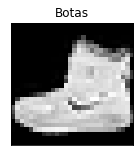

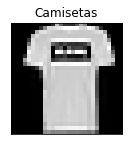

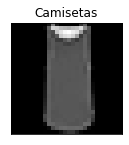

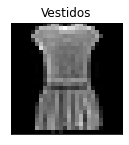

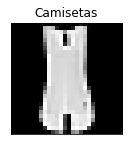

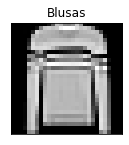

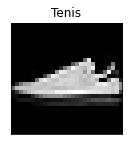

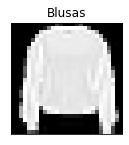

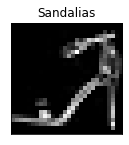

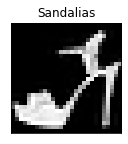

In [4]:
for i in range(10):
  plt.subplots(figsize=(20,20))
  plt.subplot(1,10, i+1)
  plt.tight_layout()
  plt.imshow(train_x[i].reshape(28,28), cmap='gray')
  plt.title('{}'.format(rotulos_classes[train_y[i]]))
  plt.xticks([])
  plt.yticks([])
plt.show()



### Planarização dos dados (flatten)

In [19]:
train_x = train_x.reshape((train_x.shape[0],28*28*1))
test_x = test_x.reshape((test_x.shape[0], 28*28*1))

print("Dados iniciais de treinamento", train_x.shape)

Dados iniciais de treinamento (60000, 784)


#### Exibição das imagens planificadas.

In [20]:
print(" --------------- 5 primeiros digitos -----------------")
for d in range(5):
    roupa = train_x[d].reshape(28,28)
    n = 28
    m = 28
    matrix = [ [ " " for i in range(n)] for j in range(m)]
    for i in range(28):
        for j in range(28):
            if roupa[i][j]>0:
                matrix[i][j] = "*"
    for i in range(28):
        print("|".join(matrix[i]))
    print(" -----------------------------------------------------")

 --------------- 5 primeiros digitos -----------------
 | | | | | | | | | | | | | | | | | | | | | | | | | | | 
 | | | | | | | | | | | | | | | | | | | | | | | | | | | 
 | | | | | | | | | | | | | | | | | | | | | | | | | | | 
 | | | | | | | | | | | |*| | |*|*| | |*|*| | | | |*|*| 
 | | | | | | | | | | | |*| |*|*|*|*|*| | | |*|*|*| | |*
 | | | | | | | | | | | |*| |*|*|*|*|*|*|*| | | | |*|*| 
 | | | | | | | | | | | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*
 | | | | | | | | | | |*| |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*
 | | | | | | | | |*|*|*| |*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 | | | | | | | | | | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 | | | | | | | | | | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 | | | | | | | | |*|*| |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*
 | | | | | | | | | |*| |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*
 | | | | | | | | |*| | |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 | |*|*|*|*|*| | | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 |*| | | | | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*| 
 | | | |*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*|*

### Separação do grupo de treinamento do modelo em 2 grupos distintos de treinamento e validação

In [7]:
tamanho_validacao = 0.20
treinamento_x, validacao_x, treinamento_y, validacao_y = train_test_split(train_x, train_y, stratify = train_y, test_size=tamanho_validacao)

#treinamento_x = treinamento_x[:,...,np.newaxis]
#validacao_x = validacao_x[:,...,np.newaxis]
#test_x = test_x[:,...,np.newaxis]


In [8]:
print("Formato dos arquivos: {}".format(treinamento_x[0].shape))
print("Tamanho do conjunto de treinamento: ", len(treinamento_x))
print("Tamanho do conjunto de validacao: ", len(validacao_x))
print("Tamanho do conjunto de teste: ", len(test_x))

Formato dos arquivos: (784,)
Tamanho do conjunto de treinamento:  48000
Tamanho do conjunto de validacao:  12000
Tamanho do conjunto de teste:  10000


In [8]:
# Adicionando padding positivo 0 para mudar o tamanho das imagens para 32x32 pixels.

In [9]:
#treinamento_x = np.pad(treinamento_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#validacao_x = np.pad(validacao_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')
#test_x = np.pad(test_x, ((0,0),(2,2),(2,2),(0,0)), 'constant')

In [10]:
# print("Formato dos arquivos: {}".format(treinamento_x[0].shape))
# print("Tamanho do conjunto de treinamento: ", len(treinamento_x))
# print("Tamanho do conjunto de validacao: ", len(validacao_x))
# print("Tamanho do conjunto de teste: ", len(test_x))

### Normalizando datasets


In [11]:
#treinamento_x = treinamento_x.reshape((treinamento_x.shape[0], 32 * 32 * 1))
#validacao_x = validacao_x.reshape((validacao_x.shape[0] ,32 * 32 * 1 ))
#test_x = test_x.reshape((test_x.shape[0],32*32*1))

In [9]:
normalizar = lambda x: x/255.0
treinamento_x = normalizar(treinamento_x)
validacao_x = normalizar(validacao_x)
test_x = normalizar(test_x)
treinamento_y = treinamento_y.astype('float32')
validacao_y = validacao_y.astype('float32')
test_y= test_y.astype('float32')

In [13]:
#normalizar = lambda x: x/255.0
#train_x = normalizar(train_x)
#test_x = normalizar(test_x)
#train_x = train_x.astype('float32')
#test_x = test_x.astype('float32')

##### Confirmando o tipo de cada variavel

In [10]:
print(treinamento_x.dtype)
print(validacao_x.dtype)
print(test_x.dtype)
print(treinamento_y.dtype)
print(validacao_y.dtype)
print(test_y.dtype)


float64
float64
float64
float32
float32
float32


### Binarizacao dos dados

In [11]:
lb = LabelBinarizer()
treinamento_y = lb.fit_transform(treinamento_y)
validacao_y = lb.transform(validacao_y)
test_y_normal = test_y
test_y = lb.transform(test_y)

### Criação da Rede Neural Feed-forward


In [12]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

### Treinamento

In [13]:
num_epocas = 100
batch = 100
sgd = SGD(0.01)
model.compile(loss='categorical_crossentropy', optimizer = sgd , metrics = ['accuracy'])
H = model.fit(treinamento_x, treinamento_y, validation_data = (validacao_x, validacao_y), epochs=num_epocas, batch_size= batch)

Epoch 1/50
480/480 [==============================] - 3s 6ms/step - loss: 2.2328 - accuracy: 0.2741 - val_loss: 2.0850 - val_accuracy: 0.4203
Epoch 2/50
480/480 [==============================] - 3s 5ms/step - loss: 1.7554 - accuracy: 0.4399 - val_loss: 1.4666 - val_accuracy: 0.5550
Epoch 3/50
480/480 [==============================] - 3s 5ms/step - loss: 1.2927 - accuracy: 0.5698 - val_loss: 1.1688 - val_accuracy: 0.5923
Epoch 4/50
480/480 [==============================] - 3s 6ms/step - loss: 1.0873 - accuracy: 0.6135 - val_loss: 1.0226 - val_accuracy: 0.6259
Epoch 5/50
480/480 [==============================] - 3s 5ms/step - loss: 0.9645 - accuracy: 0.6524 - val_loss: 0.9187 - val_accuracy: 0.6765
Epoch 6/50
480/480 [==============================] - 3s 5ms/step - loss: 0.8741 - accuracy: 0.6903 - val_loss: 0.8407 - val_accuracy: 0.7057
Epoch 7/50
480/480 [==============================] - 3s 5ms/step - loss: 0.8018 - accuracy: 0.7168 - val_loss: 0.7754 - val_accuracy: 0.7275
Epoch 

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1290      
Total params: 649,738
Trainable params: 649,738
Non-trainable params: 0
__________________________________________________

### Predição

In [15]:
predictions = model.predict(test_x, batch_size=100)
print(classification_report(test_y.argmax(axis=1),
                           predictions.argmax(axis=1),
                           target_names=[rotulos_classes[int(x)] for x in lb.classes_]))

              precision    recall  f1-score   support

   Camisetas       0.82      0.78      0.80      1000
      Calças       0.99      0.94      0.96      1000
      Blusas       0.78      0.70      0.74      1000
    Vestidos       0.78      0.88      0.83      1000
     Casacos       0.74      0.76      0.75      1000
   Sandalias       0.95      0.89      0.92      1000
     Camisas       0.60      0.61      0.60      1000
       Tenis       0.88      0.95      0.92      1000
      Bolsas       0.93      0.95      0.94      1000
       Botas       0.94      0.93      0.94      1000

    accuracy                           0.84     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.84      0.84      0.84     10000



### Plot funções de perda e acuracia dos dados de treinamento e de validação.

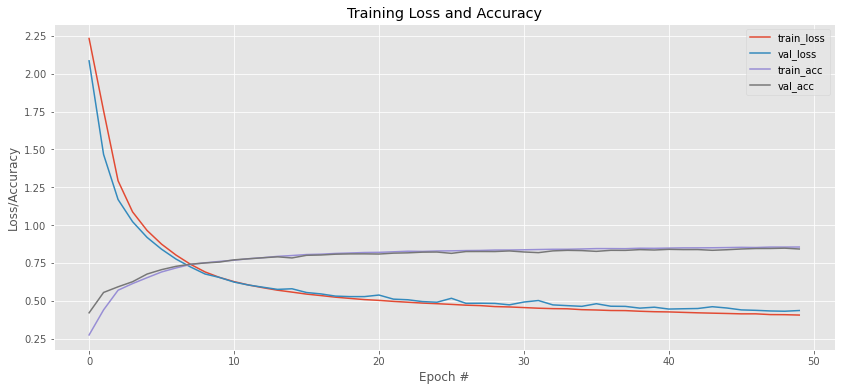

In [21]:
plt.style.use('ggplot')
plt.figure(figsize=(14,6))
plt.plot(np.arange(0,num_epocas), H.history['loss'], label='train_loss')
plt.plot(np.arange(0,num_epocas), H.history['val_loss'], label='val_loss')
plt.plot(np.arange(0,num_epocas), H.history['accuracy'], label='train_acc')
plt.plot(np.arange(0,num_epocas), H.history['val_accuracy'], label='val_acc')
plt.title('Training Loss and Accuracy')
plt.xlabel('Epoch #')
plt.ylabel('Loss/Accuracy')
plt.legend()
plt.show()


### Plot dos valores de predição


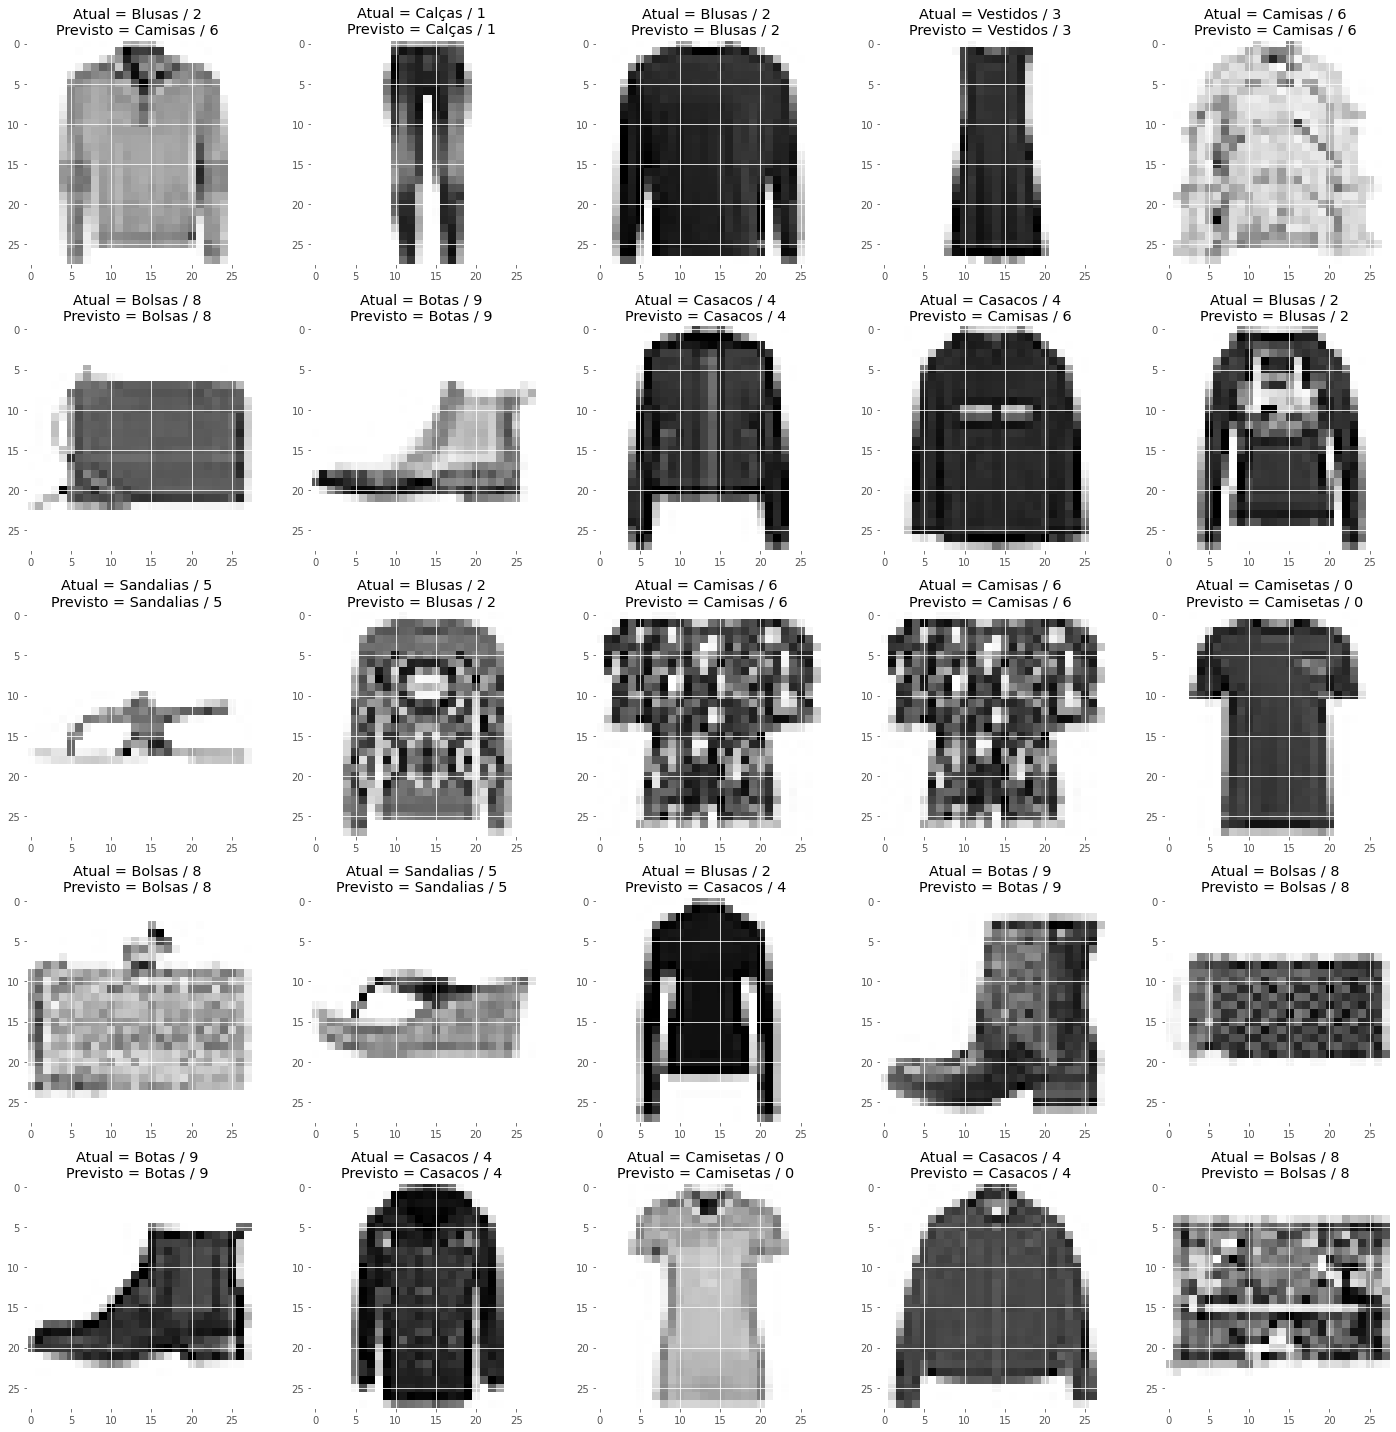

In [18]:
plt.figure(figsize=(20,20), frameon=True)

j = 1
for i in np.random.randint(0, 1000, 25):
    plt.subplot(5,5,j);j+=1
    plt.tight_layout()
    plt.imshow(test_x[i].reshape(28,28),cmap='Greys')
    
    plt.title('Atual = {} / {} \nPrevisto = {} / {} '.format(rotulos_classes[test_y_normal[i].astype(int)], 
                                                             test_y_normal[i].astype(int),
                                                             rotulos_classes[np.argmax(predictions[i])],
                                                             np.argmax(predictions[i])))
    

### Fine Tuning, modificando hiperparametros do modelo


In [ ]:
model = Sequential()
model.add(Dense(512, input_shape=(784,), activation='sigmoid'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='tanh'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='sigmoid'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# import plotly.offline as py
# import plotly.graph_objs as go
# dados = [go.Scatter(x=df.index, y=df['Close'])]
# layout = go.Layout(title='Histórico dos Preços da Ação',
#                    yaxis={'title':'Preços'},
#                    xaxis={'title': 'Período'})
# fig = go.Figure(data=dados, layout=layout)
# py.iplot(fig)